In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

OpenFF/TIP3P: 3.3013280156123033
ME MACE-OFF23(S): 3.1665359622148617
EE MACE-OFF23(S): 2.075106422973691
EE ANI-2x: 0.8523399165434723


/tmp/ipykernel_2227204/2825372456.py:57: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  ax = sns.barplot(
/tmp/ipykernel_2227204/2825372456.py:57: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


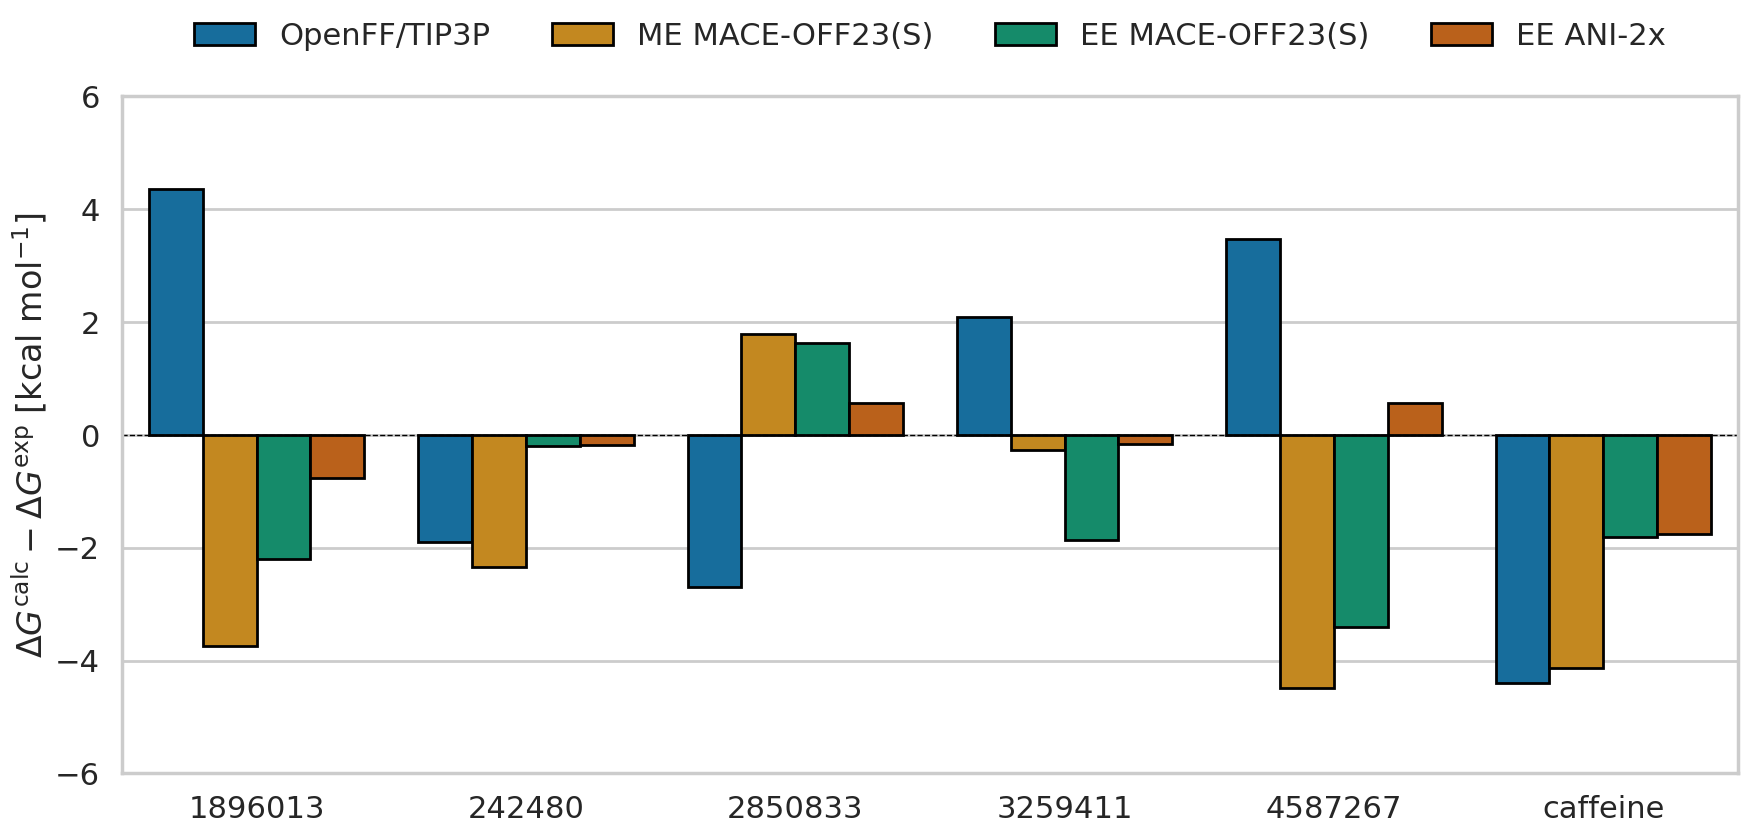

In [26]:
sns.set(style="whitegrid", palette="colorblind", context="poster")
plt.figure(figsize=(18, 8))

# Your data
molecules = [
    1896013, 2126135, 242480, 2850833, 2958326,
    3259411, 3515580, 4587267, 6917738, 9534740, "caffeine"
]

# Errors already given
models = {
    'OpenFF/TIP3P': [
        4.35, 0.06, -1.90, -2.70, 1.93, 
        2.08, 0.47, 3.46, 1.31, 4.66, -4.39
    ],
    'ME MACE-OFF23(S)': [
        -3.75, 0.16, -2.35, 1.79, 1.43,
        -0.27, -2.21, -4.49, 0.39, -3.64, -4.14
    ],
    'EE MACE-OFF23(S)': [
        -2.20, -0.64, -0.20, 1.62, 2.38, 
        -1.86, -0.04, -3.40, 0.87, -2.85, -1.82
    ],
    'EE ANI-2x': [
        -0.77, -0.82, -0.19, 0.56, 2.47,
        -0.17, 0.54, 0.57, 1.08, -2.74, -1.75
    ]
}

molecules_to_remove = [2126135, 2958326, 3515580, 6917738, 9534740]
mask = [mol in molecules_to_remove for mol in molecules]
for key, val in models.items():
    models[key] = [v for i, v in enumerate(val) if not mask[i]]

molecules = [mol for i, mol in enumerate(molecules) if not mask[i]]

# calcule rmse given these signed errors
for key, val in models.items():
    val = np.array(val)
    rmse = np.sqrt(np.mean(val**2))
    print(f"{key}: {rmse}")



# Build the DataFrame
data_dict = {"Model": [], "Molecule": [], "Error": []}

for model_name, errors in models.items():
    for mol, error in zip(molecules, errors):
        data_dict["Model"].append(model_name)
        data_dict["Molecule"].append(mol)
        data_dict["Error"].append(error)

df = pd.DataFrame(data_dict)

# Plot
ax = sns.barplot(
    data=df, x="Molecule", y="Error", hue="Model", edgecolor="black",
    capsize=0.2, errcolor="black", errwidth=1.5
)

# Customize
plt.ylabel(r"$\Delta G^{\mathrm{calc}} - \Delta G^{\mathrm{exp}}$ [kcal mol$^{-1}$]")
plt.xlabel("")
#plt.xticks([])
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=4)

# Adjust y-limits if needed
ax.set_ylim(-6, 6)

# Remove xticks


# Save and show
plt.savefig("hfe_errors_from_lists.pdf", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

In [25]:
data_dict['Molecule']

[1896013,
 2126135,
 242480,
 2850833,
 2958326,
 3259411,
 1896013,
 2126135,
 242480,
 2850833,
 2958326,
 3259411,
 1896013,
 2126135,
 242480,
 2850833,
 2958326,
 3259411,
 1896013,
 2126135,
 242480,
 2850833,
 2958326,
 3259411]